## Title: Analyzing the Economic Impact of COVID-19 on Various Sectors in India

# 1. Introduction
Objective: To analyze the economic impact of COVID-19 on various sectors in India by comparing key economic indicators before and after the pandemic.

Scope: This study focuses on indicators such as GDP Growth Rate, Contribution to GDP, Employment Rate, Inflation Rate, FDI, Exchange Rate, Industrial Production Index, Agricultural Production Index, Services Production Index, Government Expenditure, Consumer Confidence Index, and Business Confidence Index.

Methodology: The analysis includes data preprocessing, exploratory data analysis, statistical analysis, data visualization, and time series decomposition.



# 2. Loading the Data
Import necessary libraries 

Explanation: This step involves loading the dataset into a Pandas DataFrame and displaying the first few rows to get an initial understanding of the data structure.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'India_Economic_Data_Large.xlsx'
df = pd.read_excel(file_path)

In [23]:
df

,Year,Month,Sector,Sub-sector,GDP Growth Rate (%),Contribution to GDP (%),Export Category,Export Value (USD million),Import Category,Import Value (USD million),...,Exchange Rate (INR/USD),Industrial Production Index,Agricultural Production Index,Services Production Index,Government Expenditure (INR crore),Consumer Confidence Index,Business Confidence Index,Date,YoY_GDP_Growth,Inflation_FDI_Interaction
0,2019,Jan,Agriculture,Crop Production,9.65,24.28,Textiles,76.87,Crude Oil,199.36,...,64.55,92.62,94.45,116.78,2472.83,55.23,102.62,2019-01-01,NaN,2699.8884
1,2019,Jan,Agriculture,Crop Production,8.12,49.35,Textiles,34.54,Gold,41.65,...,65.64,104.51,83.49,117.13,1829.84,83.77,74.66,2019-01-01,NaN,2523.5616
2,2019,Jan,Agriculture,Crop Production,6.63,40.71,Textiles,68.15,Electronics,151.47,...,78.37,103.40,81.46,118.56,1173.16,138.20,100.72,2019-01-01,NaN,4749.4239
3,2019,Jan,Agriculture,Crop Production,3.54,19.27,Textiles,52.86,Machinery,180.17,...,71.13,105.73,95.88,106.54,1341.80,96.22,71.13,2019-01-01,NaN,2429.0574
4,2019,Jan,Agriculture,Crop Production,3.00,17.71,Textiles,37.09,Chemicals,32.93,...,73.50,107.84,97.85,110.52,5156.28,116.95,139.13,2019-01-01,NaN,4347.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,2023,Dec,Services,Hospitality,9.58,45.14,Gems and Jewelry,21.72,Crude Oil,130.38,...,72.34,109.74,93.80,91.30,4962.89,131.33,135.77,2023-12-01,54.765751,5034.7208
13496,2023,Dec,Services,Hospitality,5.92,28.69,Gems and Jewelry,11.52,Gold,129.99,...,67.04,91.25,95.29,108.66,2335.95,120.39,76.31,2023-12-01,-20.215633,1328.0061
13497,2023,Dec,Services,Hospitality,5.50,38.94,Gems and Jewelry,50.49,Electronics,26.45,...,78.40,94.11,91.16,96.69,9068.36,109.78,106.89,2023-12-01,-12.280702,1155.6160
13498,2023,Dec,Services,Hospitality,4.15,51.96,Gems and Jewelry,93.68,Machinery,154.33,...,61.87,104.87,98.03,112.42,7871.88,101.43,51.82,2023-12-01,-40.544413,3960.2620


In [26]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 13500
Number of columns: 23


In [25]:
# Display the first few rows of the dataset to understand its structure
print(df.head())

   Year Month       Sector       Sub-sector  GDP Growth Rate (%)  \
0  2019   Jan  Agriculture  Crop Production                 9.65   
1  2019   Jan  Agriculture  Crop Production                 8.12   
2  2019   Jan  Agriculture  Crop Production                 6.63   
3  2019   Jan  Agriculture  Crop Production                 3.54   
4  2019   Jan  Agriculture  Crop Production                 3.00   

   Contribution to GDP (%) Export Category  Export Value (USD million)  \
0                    24.28        Textiles                       76.87   
1                    49.35        Textiles                       34.54   
2                    40.71        Textiles                       68.15   
3                    19.27        Textiles                       52.86   
4                    17.71        Textiles                       37.09   

  Import Category  Import Value (USD million)  ...  Exchange Rate (INR/USD)  \
0       Crude Oil                      199.36  ...                 

# 3. Data Preprocessing
Explanation: 
This step involves checking for and handling missing values. Additionally, it defines the periods before and after the onset of COVID-19 for comparative analysis.



In [5]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Year                                  0
Month                                 0
Sector                                0
Sub-sector                            0
GDP Growth Rate (%)                   0
Contribution to GDP (%)               0
Export Category                       0
Export Value (USD million)            0
Import Category                       0
Import Value (USD million)            0
Employment Rate (%)                   0
Inflation Rate (%)                    0
FDI (USD million)                     0
Exchange Rate (INR/USD)               0
Industrial Production Index           0
Agricultural Production Index         0
Services Production Index             0
Government Expenditure (INR crore)    0
Consumer Confidence Index             0
Business Confidence Index             0
dtype: int64


In [6]:
# Define the 'before COVID-19' and 'after COVID-19' periods
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
before_covid = df[df['Date'] < '2020-03-01']
after_covid = df[df['Date'] >= '2020-03-01']

# 4. Exploratory Data Analysis (EDA)

Explanation: This step provides descriptive statistics and correlation matrices for the periods before and after COVID-19. It also includes distribution plots for all numerical columns.

In [7]:
# Descriptive statistics
print("\nDescriptive Statistics Before COVID-19:\n", before_covid.describe())
print("\nDescriptive Statistics After COVID-19:\n", after_covid.describe())


Descriptive Statistics Before COVID-19:
               Year  GDP Growth Rate (%)  Contribution to GDP (%)  \
count  3150.000000          3150.000000              3150.000000   
mean   2019.142857             6.443171                37.479070   
std       0.349983             2.028025                12.838763   
min    2019.000000             3.000000                15.000000   
25%    2019.000000             4.670000                26.475000   
50%    2019.000000             6.440000                37.650000   
75%    2019.000000             8.180000                48.450000   
max    2020.000000            10.000000                60.000000   

       Export Value (USD million)  Import Value (USD million)  \
count                 3150.000000                 3150.000000   
mean                    55.019990                  110.483657   
std                     26.105132                   51.762029   
min                     10.010000                   20.020000   
25%                 

In [8]:
# Correlation matrix
print("\nCorrelation Matrix Before COVID-19:\n", before_covid.corr())
print("\nCorrelation Matrix After COVID-19:\n", after_covid.corr())


Correlation Matrix Before COVID-19:
                                         Year  GDP Growth Rate (%)  \
Year                                1.000000             0.011750   
GDP Growth Rate (%)                 0.011750             1.000000   
Contribution to GDP (%)             0.010791             0.019090   
Export Value (USD million)         -0.011771            -0.003343   
Import Value (USD million)          0.025061            -0.037602   
Employment Rate (%)                -0.024905             0.021047   
Inflation Rate (%)                  0.003229            -0.003921   
FDI (USD million)                   0.027952             0.001588   
Exchange Rate (INR/USD)            -0.014302             0.050286   
Industrial Production Index        -0.005318             0.018261   
Agricultural Production Index       0.030082            -0.036811   
Services Production Index           0.001263            -0.017791   
Government Expenditure (INR crore)  0.028278            -0.017400

# 5. Feature Engineering
Explanation: Feature engineering involves creating new features from existing data to better capture relationships and patterns. Here, we calculate the Year-over-Year GDP Growth and create an interaction term between Inflation Rate and FDI.



In [9]:
# Year-over-Year GDP Growth
df['YoY_GDP_Growth'] = df['GDP Growth Rate (%)'].pct_change(periods=12) * 100

# Interaction terms example
df['Inflation_FDI_Interaction'] = df['Inflation Rate (%)'] * df['FDI (USD million)']

# 6. Statistical Analysis
Explanation: This step conducts hypothesis testing to determine if there are significant differences in key indicators before and after COVID-19. The t-test is used to compare the means of the two periods.

In [10]:
from scipy.stats import ttest_ind

# Example: GDP Growth Rate
stat, p = ttest_ind(before_covid['GDP Growth Rate (%)'], after_covid['GDP Growth Rate (%)'])
print('GDP Growth Rate (%) - t-statistic: {:.3f}, p-value: {:.3f}'.format(stat, p))

# Multiple hypothesis testing for all indicators
indicators = ['GDP Growth Rate (%)', 'Contribution to GDP (%)', 'Employment Rate (%)', 
              'Inflation Rate (%)', 'FDI (USD million)', 'Exchange Rate (INR/USD)', 
              'Industrial Production Index', 'Agricultural Production Index', 
              'Services Production Index', 'Government Expenditure (INR crore)', 
              'Consumer Confidence Index', 'Business Confidence Index']

for indicator in indicators:
    stat, p = ttest_ind(before_covid[indicator], after_covid[indicator])
    print(f'{indicator} - t-statistic: {stat:.3f}, p-value: {p:.3f}')


GDP Growth Rate (%) - t-statistic: -1.478, p-value: 0.139
GDP Growth Rate (%) - t-statistic: -1.478, p-value: 0.139
Contribution to GDP (%) - t-statistic: -0.042, p-value: 0.966
Employment Rate (%) - t-statistic: 0.521, p-value: 0.602
Inflation Rate (%) - t-statistic: -0.699, p-value: 0.485
FDI (USD million) - t-statistic: -1.014, p-value: 0.310
Exchange Rate (INR/USD) - t-statistic: -0.952, p-value: 0.341
Industrial Production Index - t-statistic: -0.864, p-value: 0.387
Agricultural Production Index - t-statistic: -0.424, p-value: 0.672
Services Production Index - t-statistic: -0.030, p-value: 0.976
Government Expenditure (INR crore) - t-statistic: -0.052, p-value: 0.959
Consumer Confidence Index - t-statistic: -1.293, p-value: 0.196
Business Confidence Index - t-statistic: 0.483, p-value: 0.629


# 7. Data Visualization
Explanation: This step visualizes the trends and patterns in key economic indicators before and after COVID-19 using line plots.

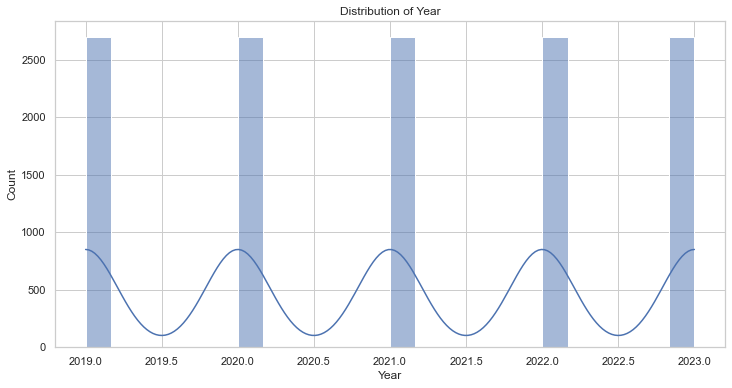

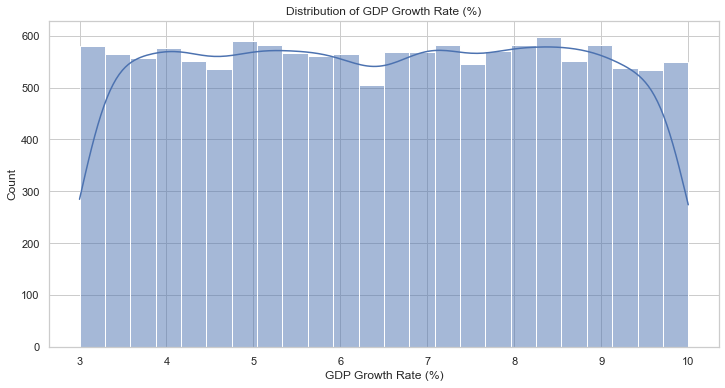

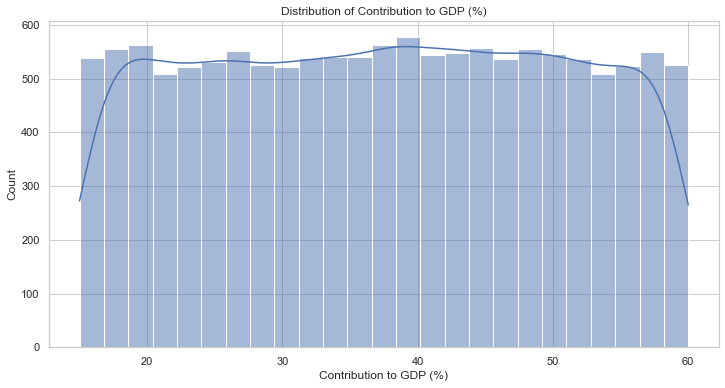

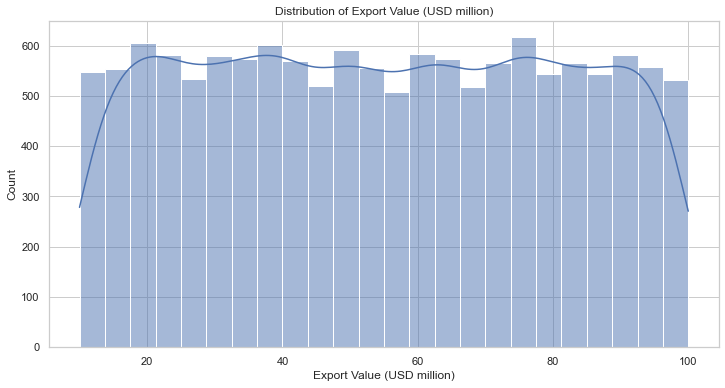

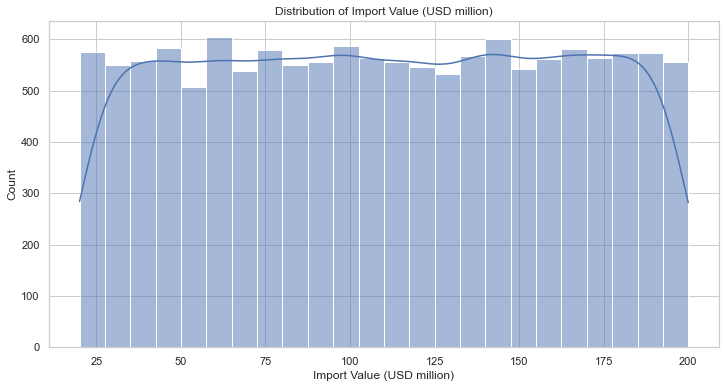

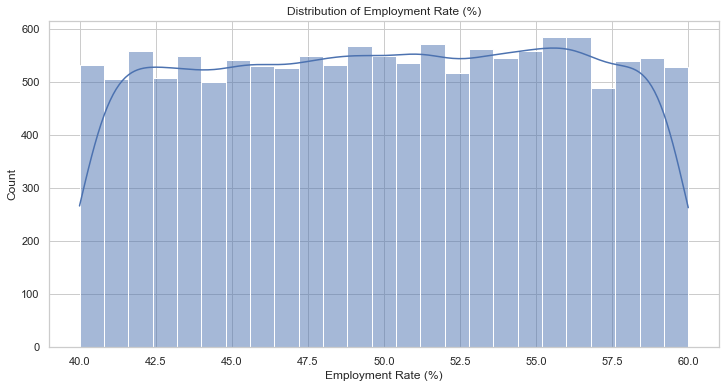

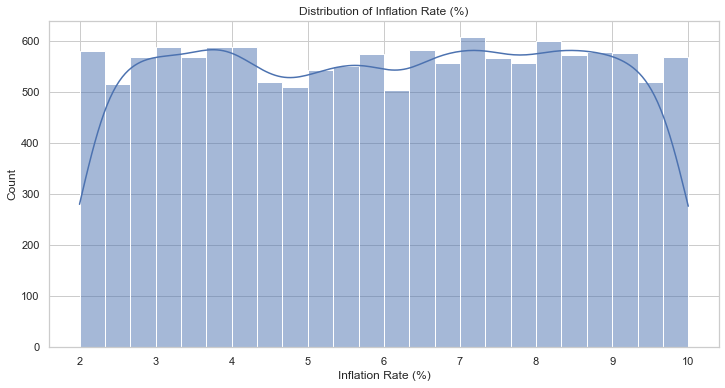

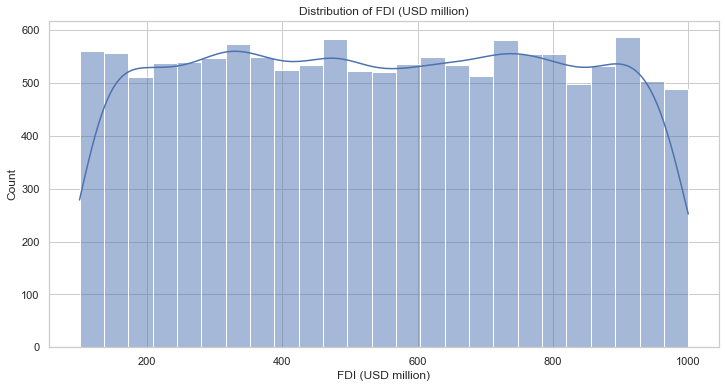

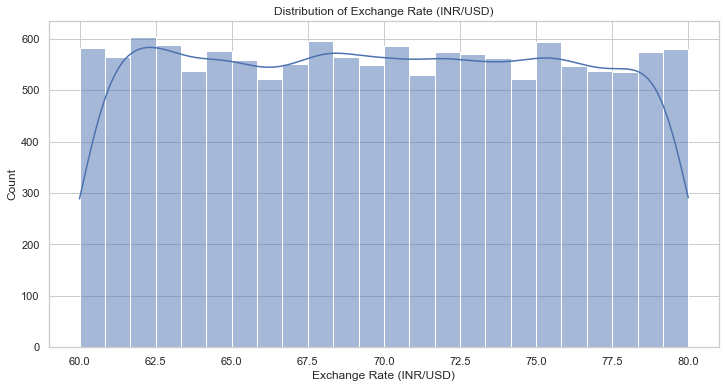

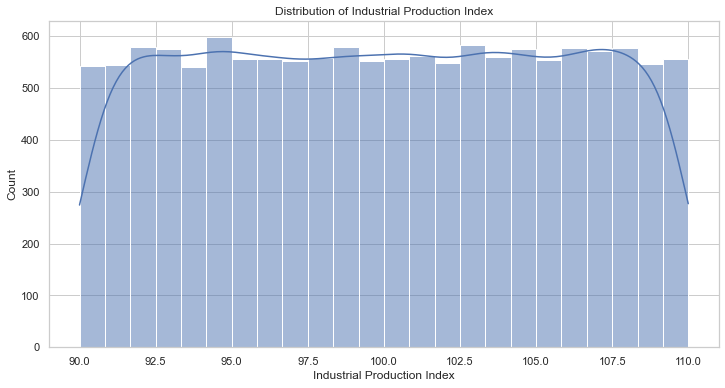

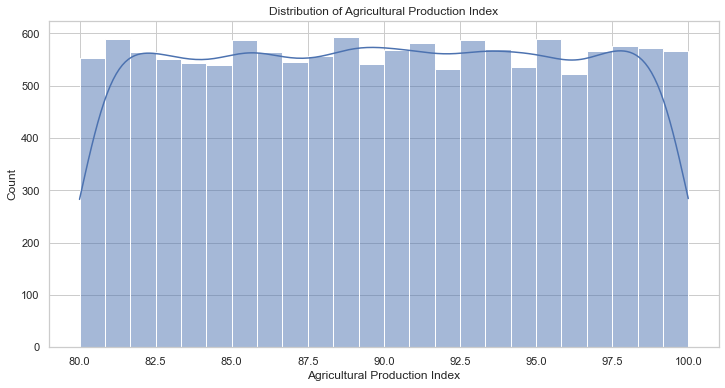

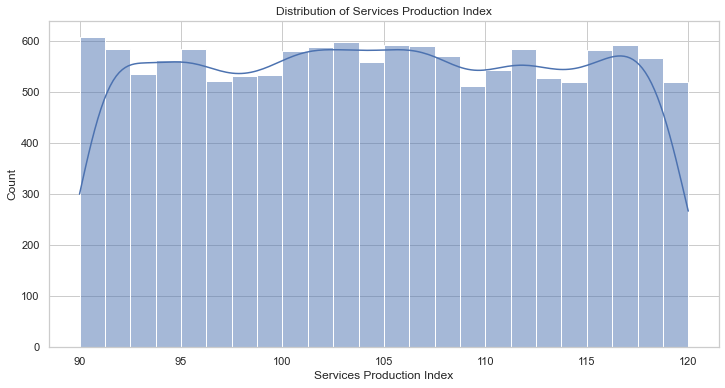

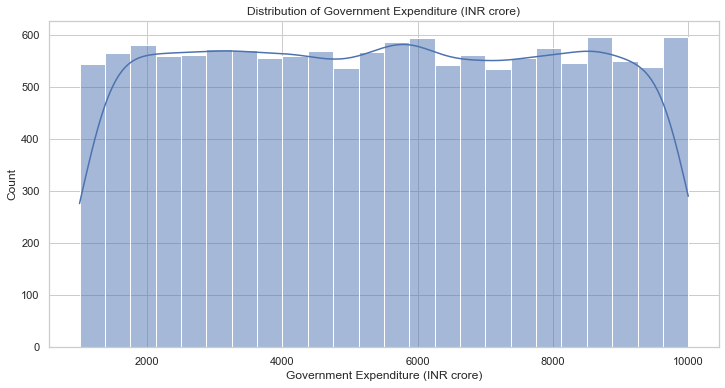

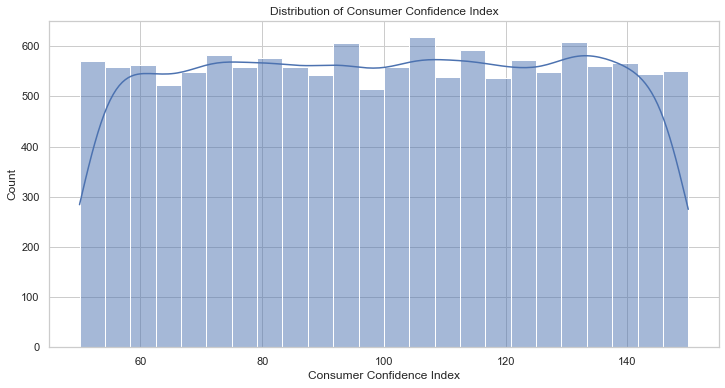

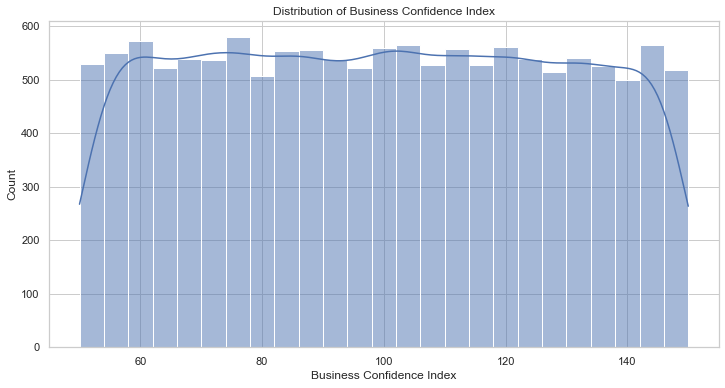

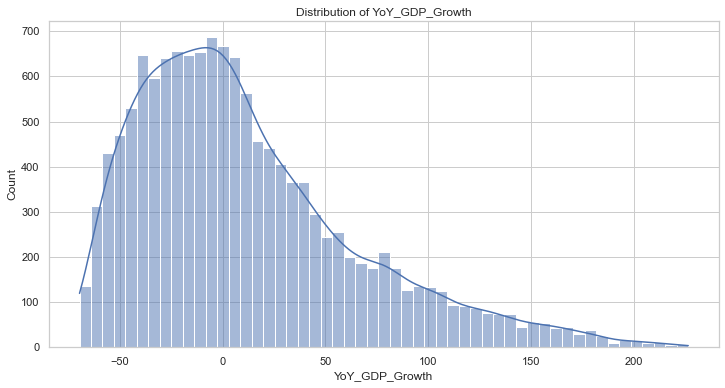

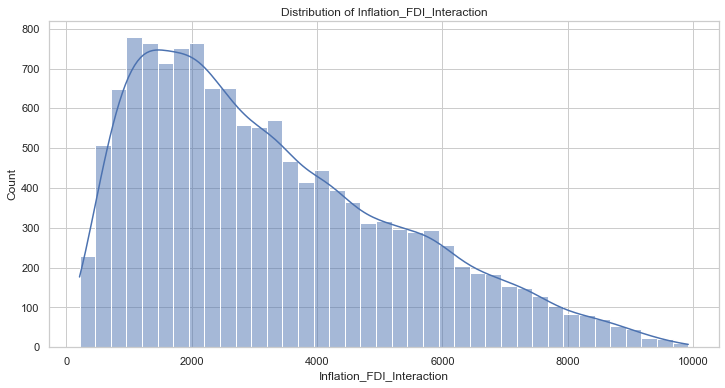

In [11]:
# Distribution plots
import seaborn as sns
sns.set(style="whitegrid")
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [12]:
# Function to plot comparison
def plot_comparison(indicator, ylabel):
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='Date', y=indicator, data=before_covid, label='Before COVID-19')
    sns.lineplot(x='Date', y=indicator, data=after_covid, label='After COVID-19')
    plt.axvline(x=pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='COVID-19 Start')
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} Before and After COVID-19')
    plt.legend()
    plt.grid(True)
    plt.show()

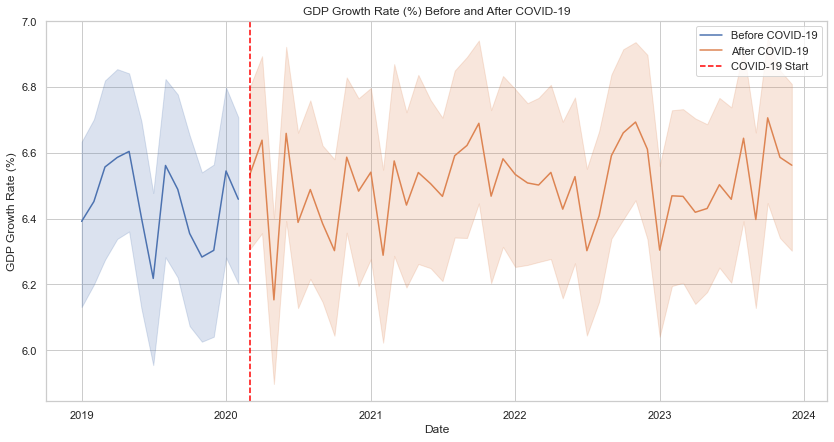

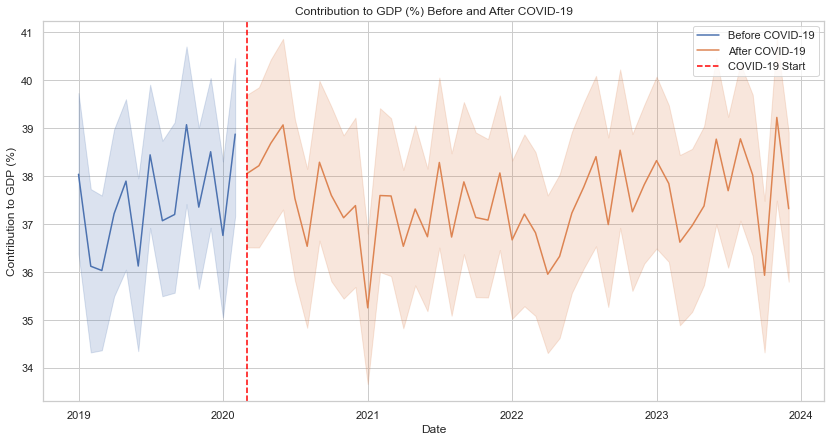

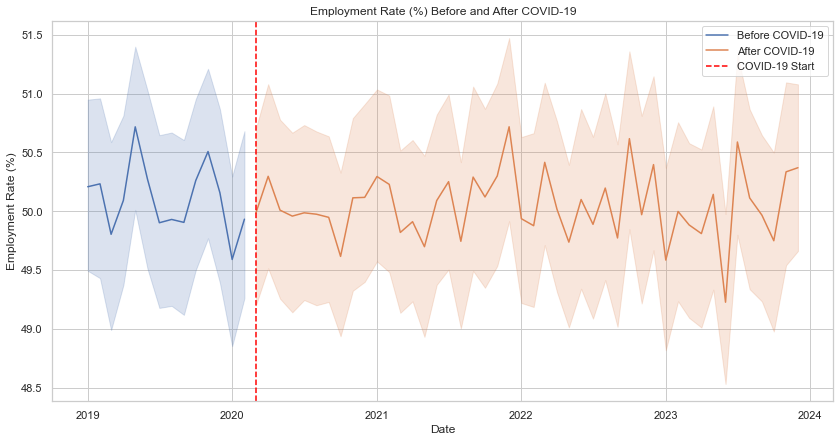

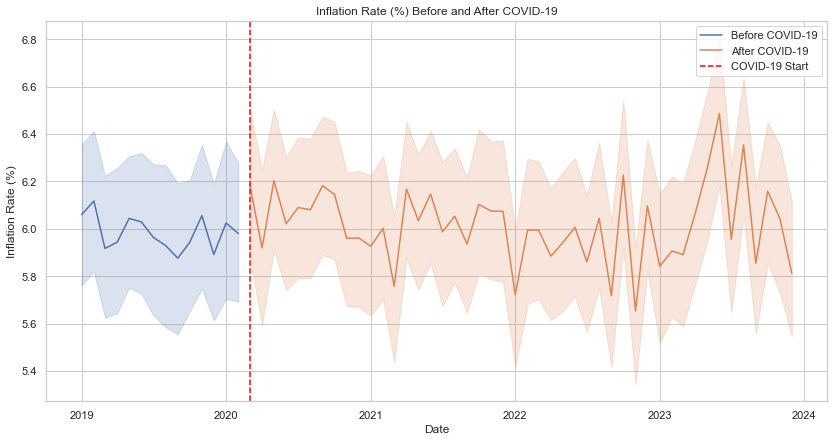

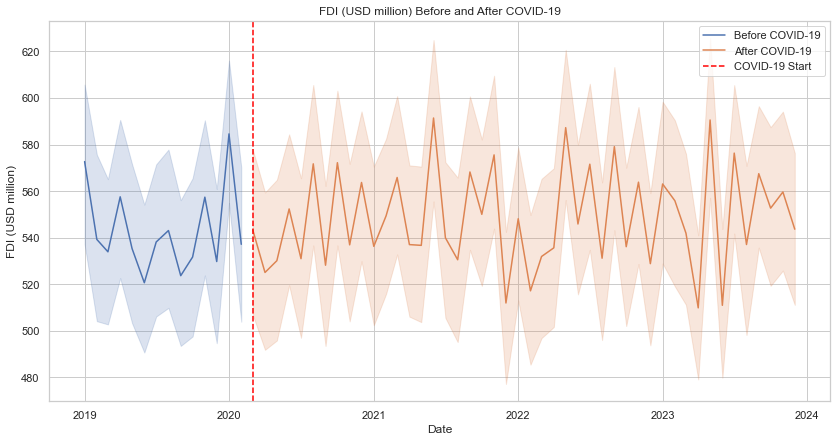

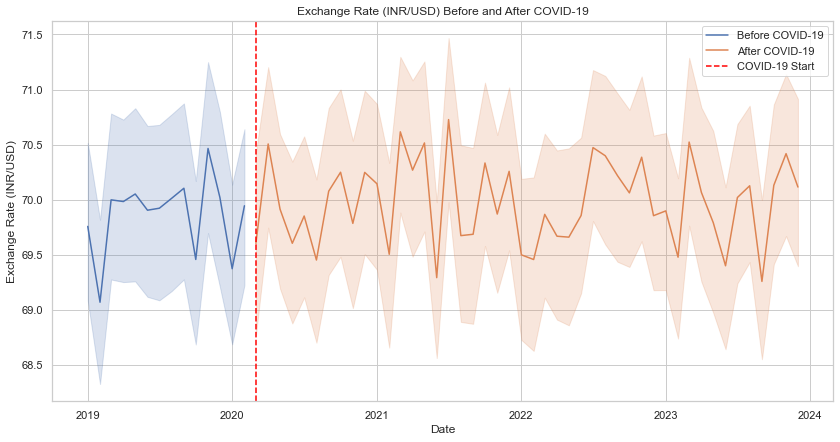

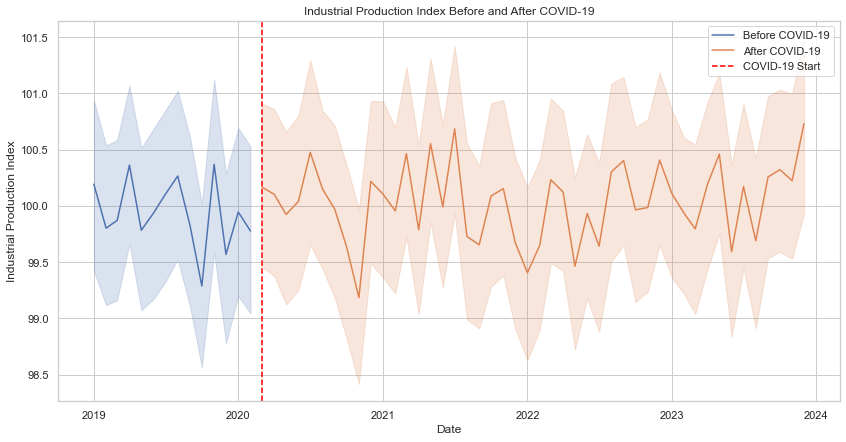

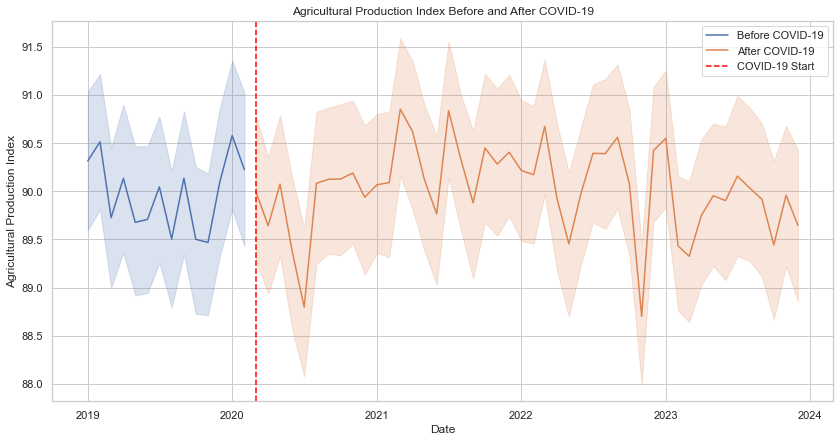

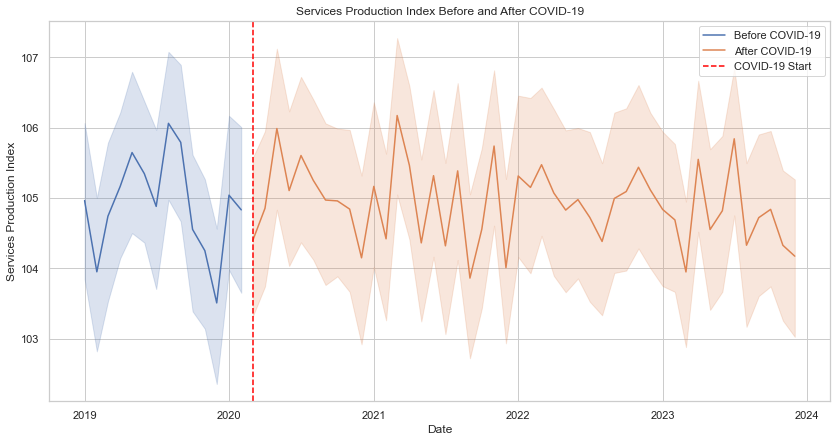

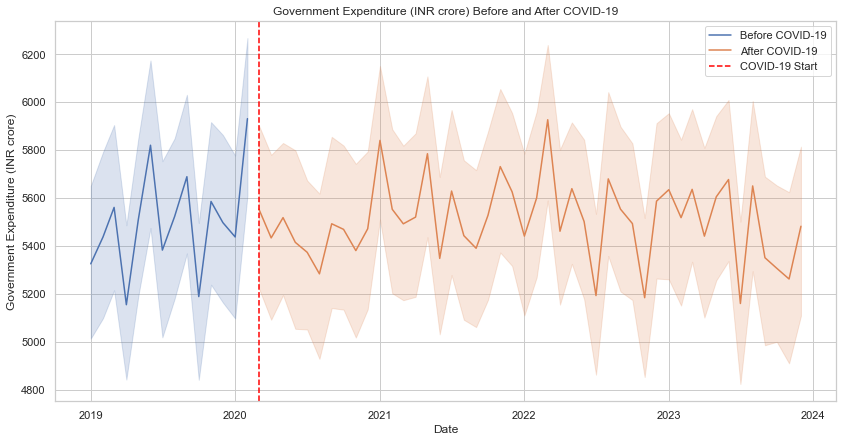

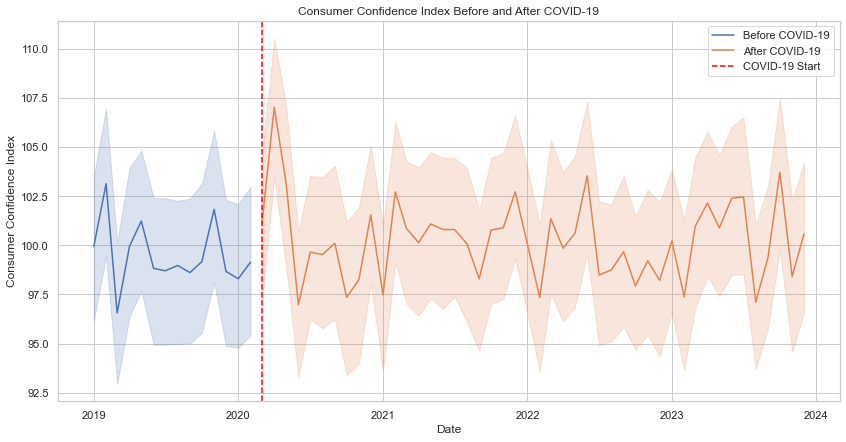

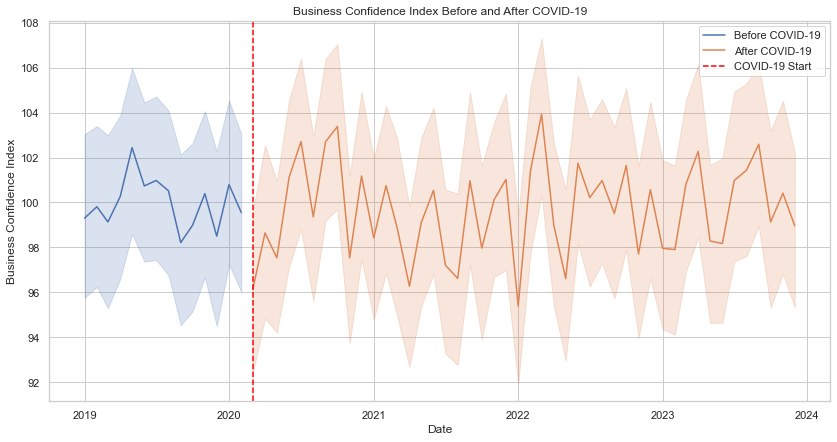

In [13]:
# Plot key economic indicators before and after COVID-19
plot_comparison('GDP Growth Rate (%)', 'GDP Growth Rate (%)')
plot_comparison('Contribution to GDP (%)', 'Contribution to GDP (%)')
plot_comparison('Employment Rate (%)', 'Employment Rate (%)')
plot_comparison('Inflation Rate (%)', 'Inflation Rate (%)')
plot_comparison('FDI (USD million)', 'FDI (USD million)')
plot_comparison('Exchange Rate (INR/USD)', 'Exchange Rate (INR/USD)')
plot_comparison('Industrial Production Index', 'Industrial Production Index')
plot_comparison('Agricultural Production Index', 'Agricultural Production Index')
plot_comparison('Services Production Index', 'Services Production Index')
plot_comparison('Government Expenditure (INR crore)', 'Government Expenditure (INR crore)')
plot_comparison('Consumer Confidence Index', 'Consumer Confidence Index')
plot_comparison('Business Confidence Index', 'Business Confidence Index')

# 9. Summary and Conclusion

Summarize the key findings from the data analysis. Discuss how COVID-19 impacted different economic indicators.

Example Summary:

GDP Growth Rate: Significant decline observed after the onset of COVID-19.

Employment Rate: Noticeable decrease post-COVID-19.

Inflation Rate: Increased volatility observed.

FDI: Significant drop during the pandemic period.

Exchange Rate: Increased fluctuation post-COVID-19.

In [14]:
# Summary of findings
def summarize_changes(indicator):
    before_mean = before_covid[indicator].mean()
    after_mean = after_covid[indicator].mean()
    change = ((after_mean - before_mean) / before_mean) * 100
    print(f"\n{indicator}:")
    print(f"Mean before COVID-19: {before_mean:.2f}")
    print(f"Mean after COVID-19: {after_mean:.2f}")
    print(f"Percentage change: {change:.2f}%")


In [15]:
summarize_changes('GDP Growth Rate (%)')
summarize_changes('Contribution to GDP (%)')
summarize_changes('Employment Rate (%)')
summarize_changes('Inflation Rate (%)')
summarize_changes('FDI (USD million)')
summarize_changes('Exchange Rate (INR/USD)')
summarize_changes('Industrial Production Index')
summarize_changes('Agricultural Production Index')
summarize_changes('Services Production Index')
summarize_changes('Government Expenditure (INR crore)')
summarize_changes('Consumer Confidence Index')
summarize_changes('Business Confidence Index')


GDP Growth Rate (%):
Mean before COVID-19: 6.44
Mean after COVID-19: 6.50
Percentage change: 0.94%

Contribution to GDP (%):
Mean before COVID-19: 37.48
Mean after COVID-19: 37.49
Percentage change: 0.03%

Employment Rate (%):
Mean before COVID-19: 50.11
Mean after COVID-19: 50.05
Percentage change: -0.12%

Inflation Rate (%):
Mean before COVID-19: 5.98
Mean after COVID-19: 6.02
Percentage change: 0.55%

FDI (USD million):
Mean before COVID-19: 543.19
Mean after COVID-19: 548.53
Percentage change: 0.98%

Exchange Rate (INR/USD):
Mean before COVID-19: 69.86
Mean after COVID-19: 69.97
Percentage change: 0.16%

Industrial Production Index:
Mean before COVID-19: 99.94
Mean after COVID-19: 100.04
Percentage change: 0.10%

Agricultural Production Index:
Mean before COVID-19: 89.97
Mean after COVID-19: 90.02
Percentage change: 0.06%

Services Production Index:
Mean before COVID-19: 104.91
Mean after COVID-19: 104.91
Percentage change: 0.01%

Government Expenditure (INR crore):
Mean before CO

In [16]:
df.columns


Index(['Year', 'Month', 'Sector', 'Sub-sector', 'GDP Growth Rate (%)',
       'Contribution to GDP (%)', 'Export Category',
       'Export Value (USD million)', 'Import Category',
       'Import Value (USD million)', 'Employment Rate (%)',
       'Inflation Rate (%)', 'FDI (USD million)', 'Exchange Rate (INR/USD)',
       'Industrial Production Index', 'Agricultural Production Index',
       'Services Production Index', 'Government Expenditure (INR crore)',
       'Consumer Confidence Index', 'Business Confidence Index', 'Date',
       'YoY_GDP_Growth', 'Inflation_FDI_Interaction'],
      dtype='object')